In [2]:
!sudo apt-get update
!sudo apt-get install postgresql postgresql-contrib -y






Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://cli.github.com/packages stable InRelease [3,917 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [85.0 kB]
Get:5 https://cli.github.com/packages stable/main amd64 Packages [356 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,909 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [6,538 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,769 

In [3]:
!sudo service postgresql start



 * Starting PostgreSQL 14 database server
   ...done.


In [6]:
!sudo -u postgres psql -c "ALTER USER postgres PASSWORD 'postgres';"
!sudo -u postgres psql -c "CREATE DATABASE mydatabase;"

ALTER ROLE
CREATE DATABASE


In [8]:
import psycopg2
conn = psycopg2.connect(
    host="localhost",
    database="mydatabase",
    user="postgres",
    password="postgres"
)

In [13]:
from google.colab import files

In [15]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zhenyavoronin","key":"e464513c1c0cda031cee3bd6e19a19e1"}'}

In [17]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [18]:
!pip install kaggle

In [24]:
!kaggle datasets download -d dmahajanbe23/ai-job-replacement-and-skill-shift-dataset

Dataset URL: https://www.kaggle.com/datasets/dmahajanbe23/ai-job-replacement-and-skill-shift-dataset
License(s): CC0-1.0
  0% 0.00/766k [00:00<?, ?B/s]
100% 766k/766k [00:00<00:00, 1.05GB/s]


In [25]:
!unzip -o ai-job-replacement-and-skill-shift-dataset.zip

Archive:  ai-job-replacement-and-skill-shift-dataset.zip
  inflating: ai_job_replacement_2020_2026_v2.csv  


In [28]:
import pandas as pd

In [30]:
df = pd.read_csv('ai_job_replacement_2020_2026_v2.csv')

In [31]:
print(df.head())

   job_id              job_role       industry country  year  \
0       0          Data Analyst     Technology  Canada  2021   
1       1            Accountant        Finance  Brazil  2020   
2       2               Teacher     Technology     USA  2020   
3       3  Customer Support Rep     Technology  Brazil  2021   
4       4               Teacher  Manufacturing   Japan  2024   

   automation_risk_percent  ai_replacement_score  skill_gap_index  \
0                    26.22                 30.94            73.20   
1                    52.08                 56.41             2.06   
2                    31.30                 31.61            43.19   
3                    56.92                 63.42            19.97   
4                    14.55                 17.17            96.56   

   salary_before_usd  salary_after_usd  salary_change_percent  \
0          101839.02          99454.42                  -2.34   
1          146389.18         139516.59                  -4.69   
2    

In [32]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   job_id                       15000 non-null  int64  
 1   job_role                     15000 non-null  object 
 2   industry                     15000 non-null  object 
 3   country                      15000 non-null  object 
 4   year                         15000 non-null  int64  
 5   automation_risk_percent      15000 non-null  float64
 6   ai_replacement_score         15000 non-null  float64
 7   skill_gap_index              15000 non-null  float64
 8   salary_before_usd            15000 non-null  float64
 9   salary_after_usd             15000 non-null  float64
 10  salary_change_percent        15000 non-null  float64
 11  skill_demand_growth_percent  15000 non-null  float64
 12  remote_feasibility_score     15000 non-null  float64
 13  ai_adoption_leve

In [33]:
print(df.describe())

             job_id          year  automation_risk_percent  \
count  15000.000000  15000.000000             15000.000000   
mean    7499.500000   2022.997200                46.176347   
std     4330.271354      1.999365                21.663635   
min        0.000000   2020.000000                 5.000000   
25%     3749.750000   2021.000000                28.790000   
50%     7499.500000   2023.000000                46.235000   
75%    11249.250000   2025.000000                63.602500   
max    14999.000000   2026.000000                94.980000   

       ai_replacement_score  skill_gap_index  salary_before_usd  \
count          15000.000000     15000.000000       15000.000000   
mean              46.155907        50.003708       89771.375196   
std               22.351347        28.811040       34522.125434   
min                4.010000         0.000000       30003.690000   
25%               28.357500        25.170000       60127.225000   
50%               45.675000        49.9

In [41]:
from sqlalchemy import create_engine, text

DB_USER = 'postgres'
DB_PASSWORD = 'postgres'
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'mydatabase'

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

In [43]:
with engine.connect() as conn:
  conn.execute(text("SELECT 1"))
  print("Подключение успешно")

Подключение успешно


In [53]:
create_table_sql = """
CREATE TABLE IF NOT EXISTS ai_impact (
  id SERIAL PRIMARY KEY,
  year INTEGER NOT NULL,
  ai_replacement_score FLOAT,
  salary_change_percent FLOAT,
  ai_disruption_intensity FLOAT,
  skill_gap_index FLOAT,
  reskilling_urgency_score FLOAT,
  remote_feasibility_score FLOAT,
  wage_volatility_index FLOAT,
  job_role TEXT,
  industry TEXT,
  country TEXT,
  automation_risk_category TEXT,
  education_requirement_level INTEGER
  );
  """


with engine.connect() as conn:
  conn.execute(text(create_table_sql))
  conn.commit()
  print("Таблица создана")




Таблица создана


In [54]:
columns_for_db = ['year', 'ai_replacement_score', 'salary_change_percent', 'ai_disruption_intensity', 'skill_gap_index', 'reskilling_urgency_score', 'remote_feasibility_score', 'wage_volatility_index', 'job_role', 'industry', 'country', 'automation_risk_category', 'education_requirement_level']


In [55]:
existing_cols = [col for col in columns_for_db if col in df.columns]
df_to_insert = df[existing_cols]

In [58]:
df_to_insert.to_sql('ai_impact', engine, if_exists='append', index=False)
print(f"Загружено {len(df_to_insert)} записей")

Загружено 15000 записей


In [59]:
count = pd.read_sql("SELECT COUNT(*) FROM ai_impact;", engine)
print(f"Всего записей: {count.iloc[0,0]}")

Всего записей: 30000


In [61]:
sample = pd.read_sql("SELECT * FROM ai_impact LIMIT 10;", engine)
print(sample)

   id  year  ai_replacement_score  salary_change_percent  \
0   1  2021                 30.94                  -2.34   
1   2  2020                 56.41                  -4.69   
2   3  2020                 31.61                 -10.13   
3   4  2021                 63.42                  -5.44   
4   5  2024                 17.17                  -6.01   
5   6  2022                  8.53                   8.23   
6   7  2020                 42.18                   7.38   
7   8  2026                 12.25                  -4.61   
8   9  2025                 22.27                  -6.77   
9  10  2020                 64.93                  -8.39   

   ai_disruption_intensity  skill_gap_index  reskilling_urgency_score  \
0                22.711764            73.20                    33.150   
1                 9.551472             2.06                    22.857   
2                11.468320            43.19                    28.516   
3                 9.704860            19.97    

In [72]:
df = pd.read_sql("SELECT * FROM ai_impact WHERE industry IN ('Retail', 'Manufacturing') AND year = 2023;" , engine)
print(df)

         id  year  ai_replacement_score  salary_change_percent  \
0        48  2023                 56.68                  -2.18   
1        50  2023                 53.02                   0.97   
2        90  2023                 80.95                   8.30   
3        95  2023                 51.24                  15.93   
4       114  2023                  6.04                  -9.23   
...     ...   ...                   ...                    ...   
1097  29910  2023                 57.86                  -4.66   
1098  29949  2023                 40.68                  -6.43   
1099  29951  2023                 12.72                  -5.45   
1100  29956  2023                 74.96                  -5.84   
1101  30000  2023                 43.18                   4.59   

      ai_disruption_intensity  skill_gap_index  reskilling_urgency_score  \
0                   38.509680            34.08                    31.294   
1                   28.419592            31.93         

In [71]:
df = pd.read_sql("SELECT * FROM ai_impact WHERE year = 2025;", engine)
print(df)

         id  year  ai_replacement_score  salary_change_percent  \
0         9  2025                 22.27                  -6.77   
1        11  2025                 27.37                   8.13   
2        15  2025                 50.93                   0.97   
3        19  2025                 52.73                  -1.92   
4        32  2025                 37.70                  -8.84   
...     ...   ...                   ...                    ...   
4411  29958  2025                 44.77                 -11.63   
4412  29967  2025                 10.64                  -0.82   
4413  29975  2025                 58.45                   0.49   
4414  29985  2025                 31.88                  -5.86   
4415  29996  2025                 38.61                   2.83   

      ai_disruption_intensity  skill_gap_index  reskilling_urgency_score  \
0                   16.195830             7.46                    12.213   
1                   15.658152            31.10         

In [76]:
sql_1 = """
SELECT year, AVG(ai_replacement_score) AS avg_replacement_score
FROM ai_impact
GROUP BY year
ORDER BY year;
"""

df = pd.read_sql(sql_1, engine)
print("Средний балл замещения ИИ по годам:")
print(df)

Средний балл замещения ИИ по годам:
   year  avg_replacement_score
0  2020              46.464474
1  2021              45.956078
2  2022              46.371078
3  2023              46.595314
4  2024              45.240497
5  2025              45.468270
6  2026              46.980519


In [77]:
sql_2 = """
SELECT country, SUM(wage_volatility_index) AS total_volatility
FROM ai_impact
GROUP BY country
ORDER BY total_volatility DESC;
"""

df2 = pd.read_sql(sql_2, engine)
print("Суммарный индекс волатильности зарплат по странам:")
print(df2)

Суммарный индекс волатильности зарплат по странам:
     country  total_volatility
0  Singapore          28582.84
1        USA          27604.30
2         UK          27291.84
3  Australia          26695.94
4      Japan          26591.12
5     Brazil          26292.74
6      India          25633.22
7     Canada          25541.56
8    Germany          25359.68


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
sns.set_style('whitegrid')
%matplotlib inline

In [81]:
query_avg_year = """
SELECT year, AVG(ai_replacement_score) AS avg_score
FROM ai_impact
GROUP BY year
ORDER BY year;
"""
df_avg_year = pd.read_sql(query_avg_year, engine)

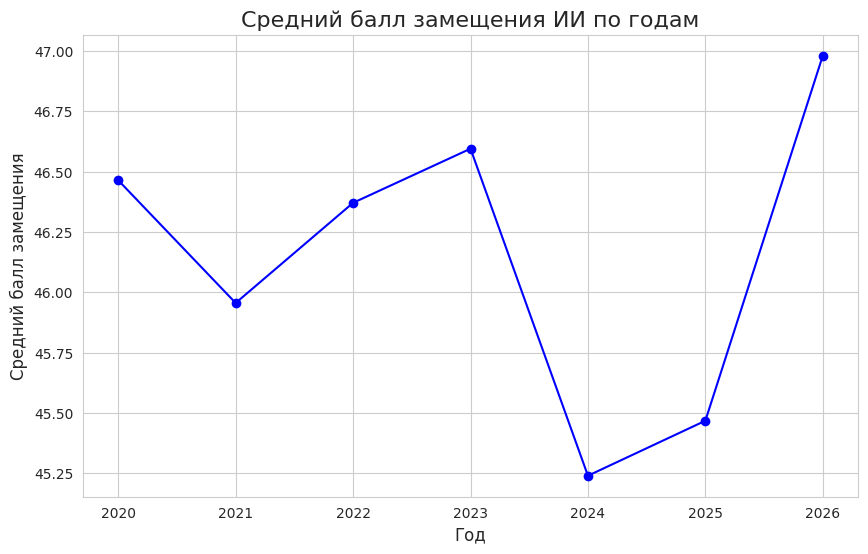

In [82]:
plt.figure(figsize=(10, 6))
plt.plot(df_avg_year['year'], df_avg_year['avg_score'], marker='o', linestyle='-', color='b')
plt.title('Средний балл замещения ИИ по годам', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средний балл замещения', fontsize=12)
plt.grid(True)
plt.show()

/tmp/ipython-input-1199686185.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_salary, x='country', y='avg_salary_change', palette='viridis')


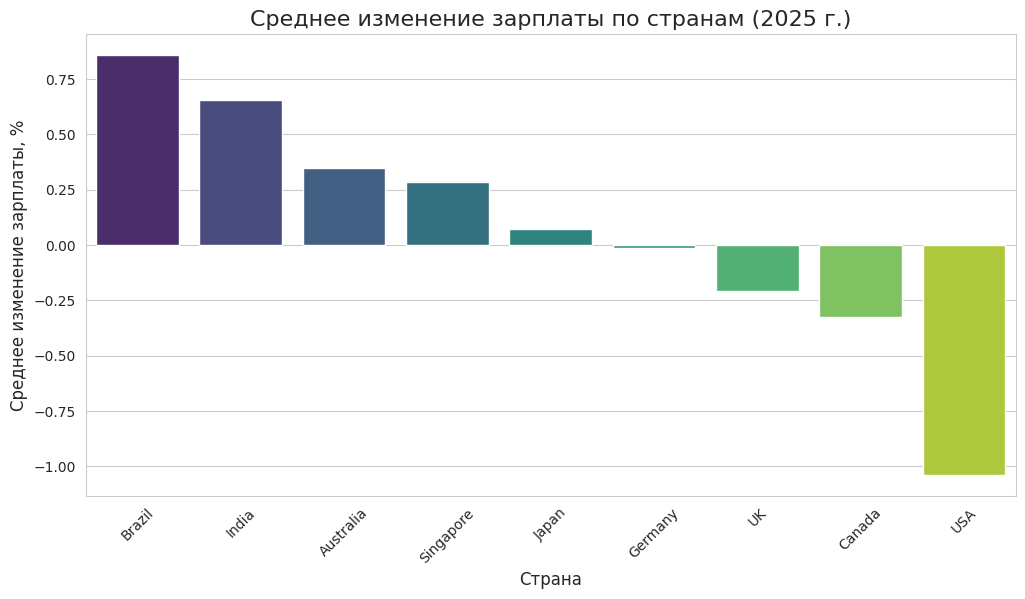

In [83]:
query_salary_2025 = """
SELECT country, AVG(salary_change_percent) AS avg_salary_change
FROM ai_impact
WHERE year = 2025
GROUP BY country
ORDER BY avg_salary_change DESC;
"""
df_salary = pd.read_sql(query_salary_2025, engine)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_salary, x='country', y='avg_salary_change', palette='viridis')
plt.title('Среднее изменение зарплаты по странам (2025 г.)', fontsize=16)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Среднее изменение зарплаты, %', fontsize=12)
plt.xticks(rotation=45)
plt.show()

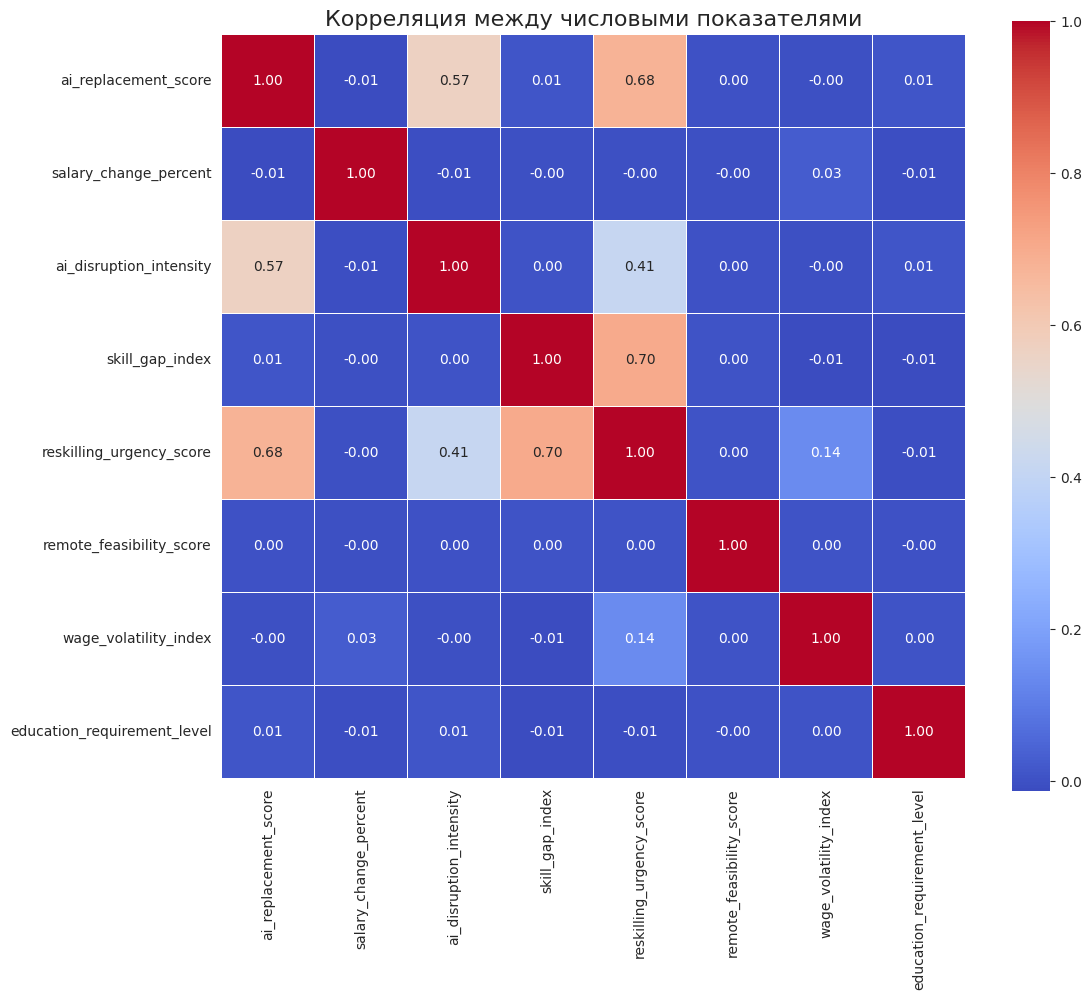

In [106]:
numeric_cols = ['ai_replacement_score', 'salary_change_percent', 'ai_disruption_intensity',
                'skill_gap_index', 'reskilling_urgency_score', 'remote_feasibility_score',
                'wage_volatility_index', 'education_requirement_level']

query_corr = f"SELECT {', '.join(numeric_cols)} FROM ai_impact;"
df_corr = pd.read_sql(query_corr, engine)

corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Корреляция между числовыми показателями', fontsize=16)
plt.show()

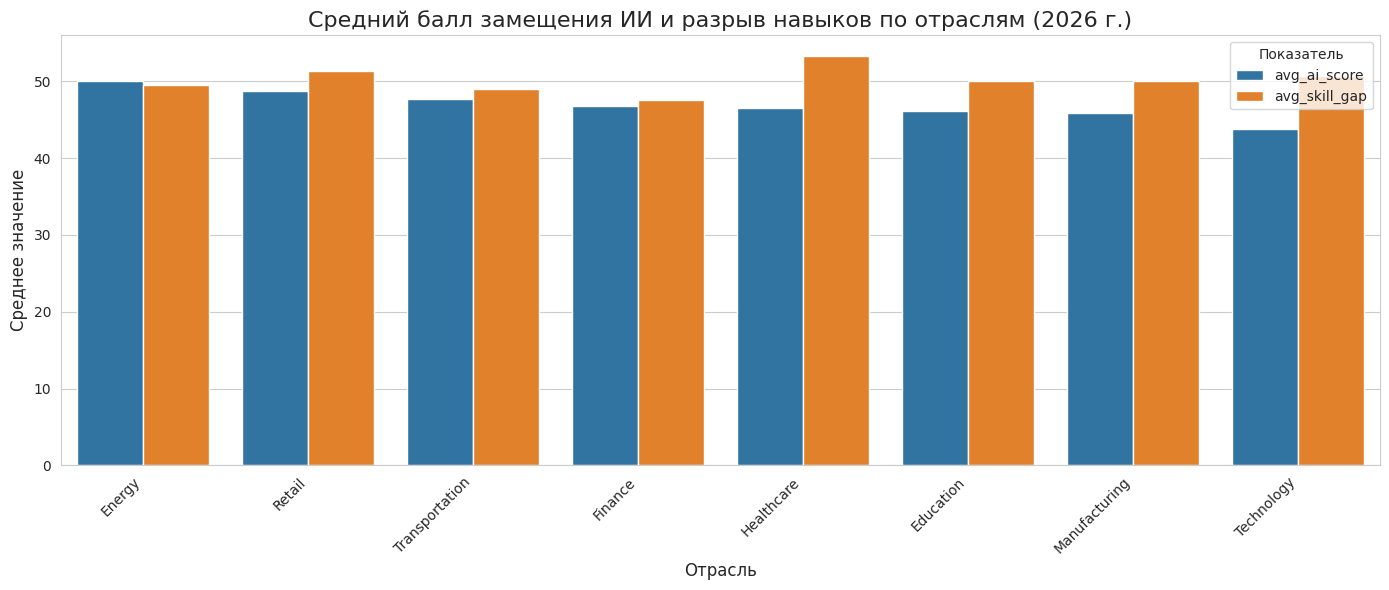

In [105]:
query_industry = """
SELECT industry,
       AVG(ai_replacement_score) AS avg_ai_score,
       AVG(skill_gap_index) AS avg_skill_gap
FROM ai_impact
WHERE year = 2026
GROUP BY industry
ORDER BY avg_ai_score DESC;
"""
df_industry = pd.read_sql(query_industry, engine)

# Преобразуем для построения двух рядов
df_melted = df_industry.melt(id_vars='industry', value_vars=['avg_ai_score', 'avg_skill_gap'],
                              var_name='metric', value_name='value')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melted, x='industry', y='value', hue='metric', palette=['#1f77b4', '#ff7f0e'])
plt.title('Средний балл замещения ИИ и разрыв навыков по отраслям (2026 г.)', fontsize=16)
plt.xlabel('Отрасль', fontsize=12)
plt.ylabel('Среднее значение', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Показатель')
plt.tight_layout()
plt.show()